<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [1]:
student_number = "401106663"
full_name = "Arian Noori"
assert student_number and full_name is not None, 'please input your information'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [3]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

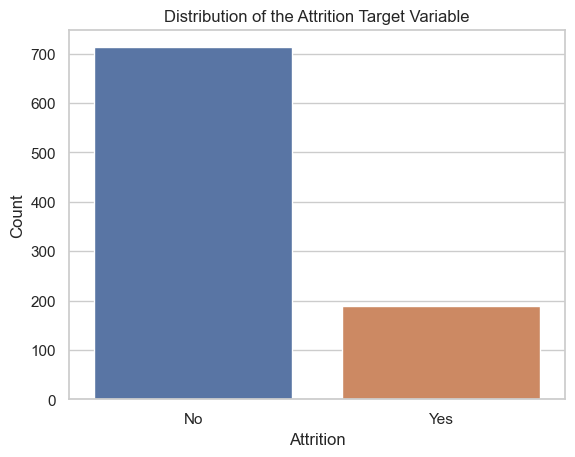

In [4]:
df.info()
print("\n")
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


attrition_counts = df['Attrition'].value_counts()
print("Attrition distribution:\n", attrition_counts)


sns.countplot(x='Attrition', data=df)
plt.title('Distribution of the Attrition Target Variable')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [7]:
unique_values = {col: df[col].nunique() for col in df.columns}
print("Number of unique values in each column:\n", unique_values)

columns_to_remove = [col for col, count in unique_values.items() if count == 1]


df = df.drop(columns=columns_to_remove)
print("\nColumns removed:", columns_to_remove)


print("\n")
unique_values = {column: df[column].nunique() for column in df.columns}
print("Unique values per column:\n", unique_values)

Number of unique values in each column:
 {'Age': 42, 'Attrition': 2, 'BusinessTravel': 3, 'DailyRate': 653, 'Department': 3, 'DistanceFromHome': 29, 'Education': 5, 'EducationField': 6, 'EmployeeCount': 1, 'EmployeeNumber': 902, 'EnvironmentSatisfaction': 4, 'Gender': 2, 'HourlyRate': 71, 'JobInvolvement': 4, 'JobLevel': 5, 'JobRole': 9, 'JobSatisfaction': 4, 'MaritalStatus': 3, 'MonthlyIncome': 853, 'MonthlyRate': 888, 'NumCompaniesWorked': 10, 'Over18': 1, 'OverTime': 2, 'PercentSalaryHike': 15, 'PerformanceRating': 2, 'RelationshipSatisfaction': 4, 'StandardHours': 1, 'StockOptionLevel': 4, 'TotalWorkingYears': 40, 'TrainingTimesLastYear': 7, 'WorkLifeBalance': 4, 'YearsAtCompany': 34, 'YearsInCurrentRole': 19, 'YearsSinceLastPromotion': 16, 'YearsWithCurrManager': 17}

Columns removed: ['EmployeeCount', 'Over18', 'StandardHours']


Unique values per column:
 {'Age': 42, 'Attrition': 2, 'BusinessTravel': 3, 'DailyRate': 653, 'Department': 3, 'DistanceFromHome': 29, 'Education': 5, '

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

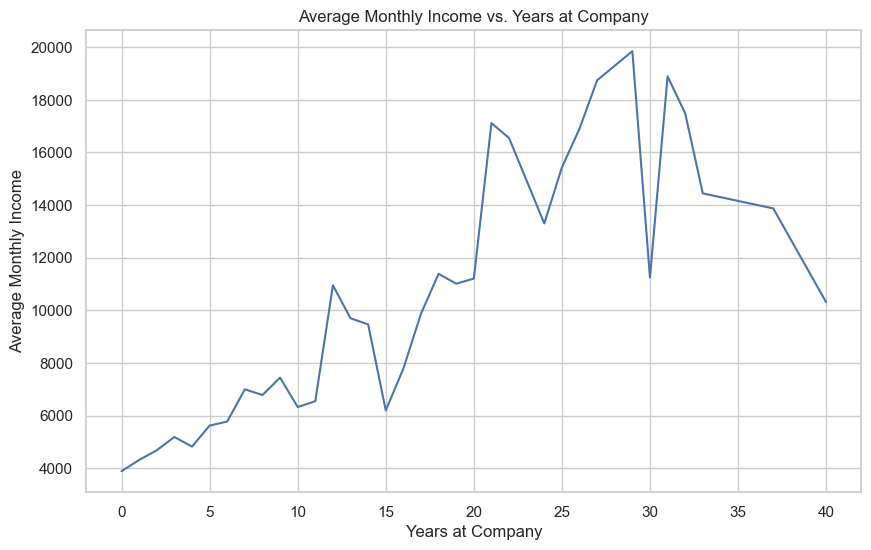


Department with the highest average income: Sales
Department with the lowest average income: Research & Development


In [9]:
avg_income_by_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()


plt.figure(figsize = (10, 6))
sns.lineplot(x = 'YearsAtCompany', y = 'MonthlyIncome', data = avg_income_by_years)
plt.title('Average Monthly Income vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.show()


avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False)
highest_income_department = avg_income_by_department.idxmax()
lowest_income_department = avg_income_by_department.idxmin()

print(f"\nDepartment with the highest average income: {highest_income_department}")
print(f"Department with the lowest average income: {lowest_income_department}")

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [10]:
label_encoder = LabelEncoder()
encoded_df = df.copy()
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(df[col])

In [11]:
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [12]:
import numpy as np


class CustomKNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        euc_distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        sorted_labels = np.argsort(euc_distances)[:self.k]
        
        k_nearest_labels = [self.y_train[i] for i in sorted_labels]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

Fit and test your model using different k values and then choose the best one.

In [13]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    knn_model = CustomKNN(k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred_custom = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append((k, accuracy))
    print(f'k: {k} - Accuracy: {accuracy}')


bestk, best_accuracy = max(accuracies, key=lambda x: x[1])
Best_custom_model = CustomKNN(bestk)
Best_custom_model.fit(X_train_scaled, y_train)

print(f'\n\nBest k: {bestk} with accuracy: {best_accuracy}')

k: 1 - Accuracy: 0.8081180811808119
k: 3 - Accuracy: 0.8007380073800738
k: 5 - Accuracy: 0.8007380073800738
k: 7 - Accuracy: 0.8265682656826568
k: 9 - Accuracy: 0.8302583025830258
k: 11 - Accuracy: 0.8154981549815498
k: 13 - Accuracy: 0.8265682656826568
k: 15 - Accuracy: 0.8118081180811808


Best k: 9 with accuracy: 0.8302583025830258


In [14]:
y_pred_best = Best_custom_model.predict(X_test_scaled)


best_model_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of the best model (k = {bestk}): {best_model_accuracy:.2f}\n')


print('Classification Report:')
print(classification_report(y_test, y_pred_best))

Accuracy of the best model (k = 9): 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       216
           1       0.85      0.20      0.32        55

    accuracy                           0.83       271
   macro avg       0.84      0.60      0.61       271
weighted avg       0.83      0.83      0.79       271



Visualize the confusion matrix for KNN predictions

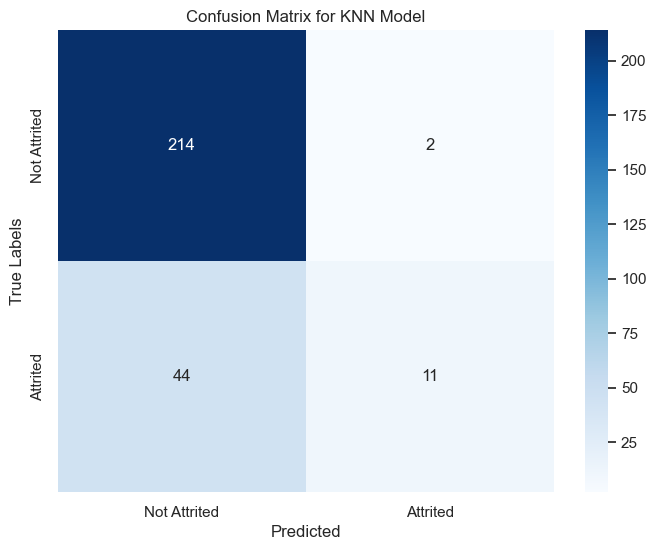

In [31]:
cf = confusion_matrix(y_test, y_pred_best)


plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [22]:
# Load test.csv
eval_df = pd.read_csv('test.csv')
X_eval_scaled = scaler.transform(eval_df)
y_pred_eval = Best_custom_model.predict(X_eval_scaled)

Save the results in a DataFrame

In [23]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [25]:
rf = RandomForestClassifier(random_state=42)

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, parameters, cv=5)
rf_cv.fit(X_train_scaled, y_train)
y_pred_rf = rf_cv.best_estimator_.predict(X_test_scaled)


rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}\n')


print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8339

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       216
           1       0.78      0.25      0.38        55

    accuracy                           0.83       271
   macro avg       0.81      0.62      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for Random Forest predictions

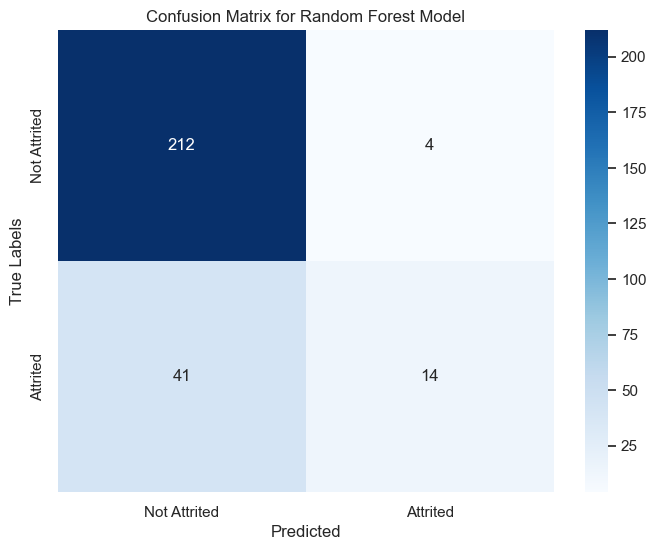

In [28]:
cf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

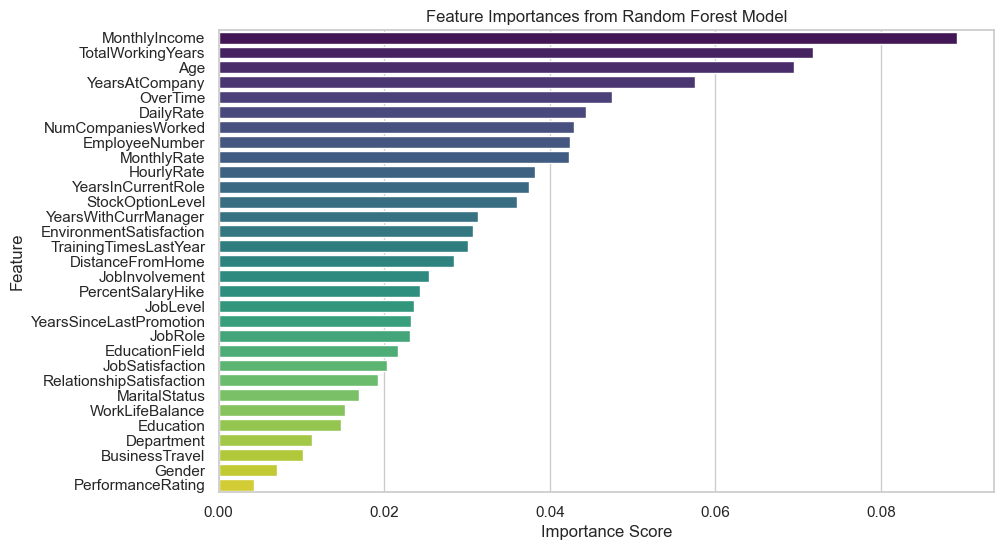

In [29]:
# Get the feature importances from the trained Random Forest model
importances = rf_cv.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tick_params(axis='y', labelrotation=0)
plt.show()

# Bagging with KNN (12 points)

In [30]:
# TODO: Implement Bagging with KNN
# Use BaggingClassifier with KNeighborsClassifier as the base estimator
# Here we use the bestk value we found before

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

# TODO: Fit the BaggingClassifier on the scaled training data
bagging_knn.fit(X_train_scaled, y_train)

# TODO: Use the trained Bagging model for predictions on the test data
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# TODO: Print the Bagging KNN model accuracy and classification report
bagging_accuracy = accuracy_score(y_test, y_pred_bagging_knn)
report = classification_report(y_test, y_pred_bagging_knn)

print(f'Bagging KNN Model Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

Bagging KNN Model Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       216
           1       0.90      0.16      0.28        55

    accuracy                           0.83       271
   macro avg       0.86      0.58      0.59       271
weighted avg       0.84      0.83      0.77       271



Visualize the confusion matrix for Baggin KNN predictions

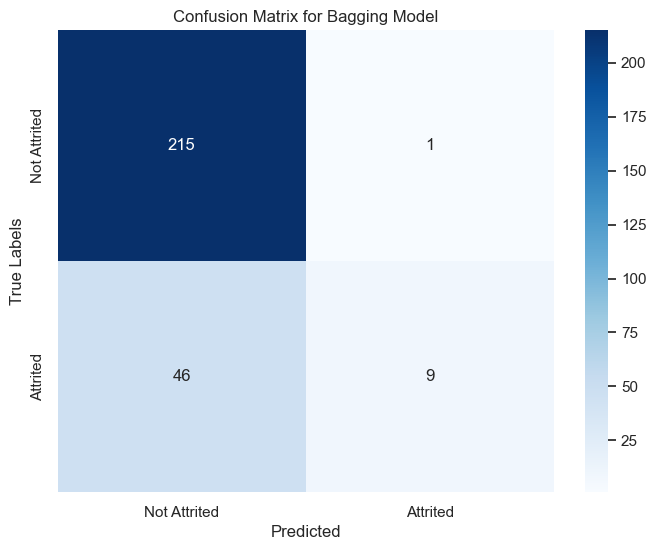

In [33]:
# TODO: Create a confusion matrix for Bagging KNN predictions
cf = confusion_matrix(y_test, y_pred_bagging_knn)

# TODO: Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for Bagging Model')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

# AdaBoost Model (12 points)

In [34]:
# TODO: Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)


parameters = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, parameters, cv=5)

adaboost_cv.fit(X_train_scaled, y_train)

y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test_scaled)

adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)
report = classification_report(y_test, y_pred_adaboost)

print(f'AdaBoost Model Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

AdaBoost Model Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.90       216
           1       0.81      0.24      0.37        55

    accuracy                           0.83       271
   macro avg       0.82      0.61      0.64       271
weighted avg       0.83      0.83      0.80       271



Visualize the confusion matrix for AdaBoost predictions

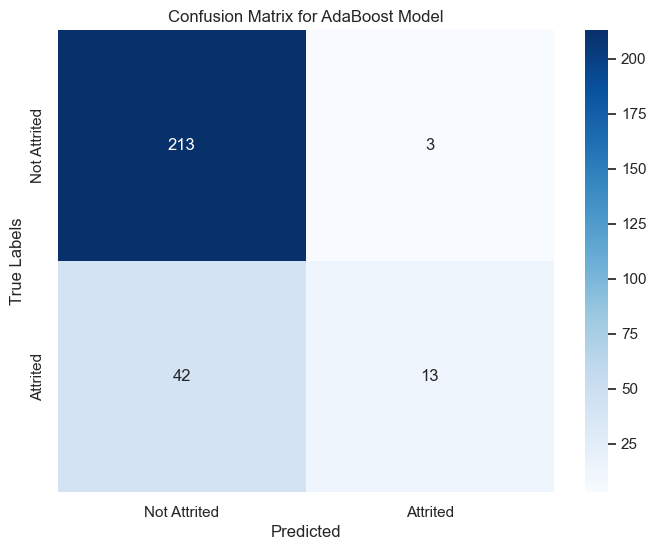

In [35]:
# TODO: Create a confusion matrix for AdaBoost predictions
cf = confusion_matrix(y_test, y_pred_adaboost)

# TODO: Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attrited', 'Attrited'], yticklabels=['Not Attrited', 'Attrited'])
plt.title('Confusion Matrix for AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

# Model Comparison (4 points)

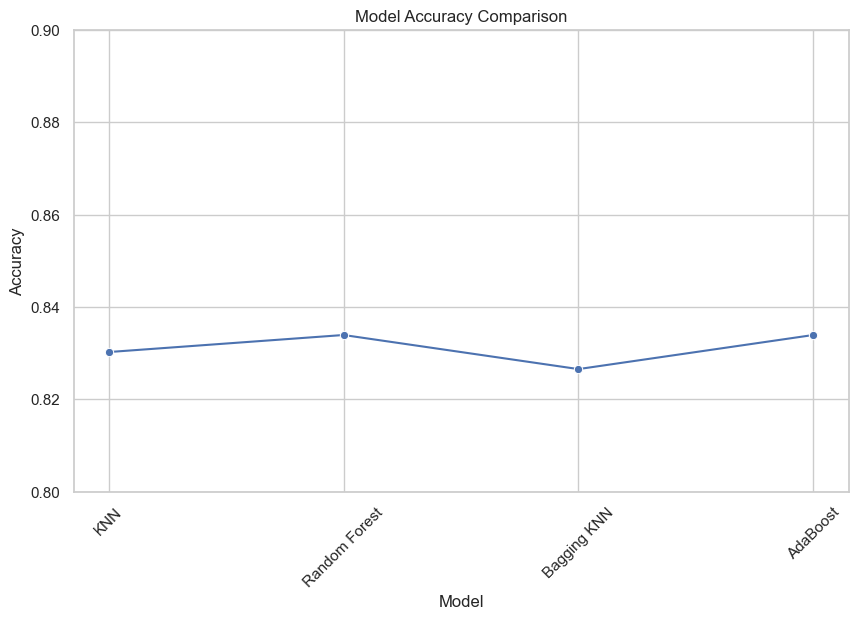

In [36]:
# Accuracies from previous models
accuracies = {
    'Model': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],
    'Accuracy': [best_accuracy, rf_accuracy, bagging_accuracy, adaboost_accuracy]
}


# Create a DataFrame
accuracy_df = pd.DataFrame(accuracies)


# Set the aesthetics of the plot
sns.set(style='whitegrid')

# TODO: Visualize the model comparison using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_df, x='Model', y='Accuracy', marker='o')

# Adding titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.9)  
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [1]:
import random

def generate_table_with_neighbors(n, max_size=50):
    rows = random.randint(6, max_size)  # انتخاب تعداد سطرها (بین 6 تا max_size)
    cols = random.randint(6, max_size)  # انتخاب تعداد ستون‌ها (بین 6 تا max_size)

    # ایجاد یک جدول خالی
    table = [['.' for _ in range(cols)] for _ in range(rows)]

    count = 0
    while count < n:
        # انتخاب یک خانه تصادفی
        x = random.randint(1, rows - 2)
        y = random.randint(1, cols - 2)

        # قرار دادن 'X' در موقعیت‌های خاص در اطراف (برای سه همسایه)
        if table[x][y] == '.':  # مطمئن شوید که خانه قبلاً استفاده نشده است
            neighbors = [
                (x-1, y), (x+1, y), (x, y-1), (x, y+1),
                (x-1, y-1), (x-1, y+1), (x+1, y-1), (x+1, y+1)
            ]
            valid_neighbors = random.sample(neighbors, 3)
            
            if all(table[nx][ny] == '.' for nx, ny in valid_neighbors):
                table[x][y] = '.'
                for nx, ny in valid_neighbors:
                    table[nx][ny] = 'X'
                count += 1

    # چاپ جدول نهایی
    print(rows, cols)
    for row in table:
        print(''.join(row))

# تست تابع
n = int(input("Enter the number of cells with 3 'X' neighbors: "))
generate_table_with_neighbors(n)


Enter the number of cells with 3 'X' neighbors: 5
30 18
..................
..................
..................
..................
..................
..................
..................
........XX......XX
..................
..........X.....X.
..................
.........X.X......
..................
...........X......
..................
..................
..................
..................
..................
..................
...............XX.
..................
..............X...
..................
..................
..................
..................
.....X............
.....X............
.....X............
